In [231]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [8]:
"""Set up API"""
consumer_key = "L2fBrsEWwwPdBhUUl83TNPOKU"
consumer_key_secret = "tVB5qxeYtkwQBJIQYxH39TIDbZyY67A52avt0ux4JYX5jcECB9"
access_token = "1311522424631054337-AINIT4cibjhWEfRwymTo310epQJqDC"
access_token_secret = "mk2LDTquxmz4EtaxSaOQF7lpipilJUGUbHJOtA2pvRuYa"

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


user = api.me()
print(user)

User(_api=<tweepy.api.API object at 0x0000026588457588>, _json={'id': 1311522424631054337, 'id_str': '1311522424631054337', 'name': 'Victiny', 'screen_name': 'Victiny8', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Thu Oct 01 04:24:57 +0000 2020', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal

In [11]:
"""Extract tweets"""
tweets = []

for page in range(1, 5):
    # user_timeline gets the 20 most recent statuses posted from the authenticating user or the user specified
    # id, user_id, screen_name: specifiy the user
    # since_id (statuses greater than, more recent), max_id (smaller, older)
    # count: the number of reslts to try and retrieve per page
    tweets.extend(api.user_timeline(screen_name="realDonaldTrump", count=200, page=page))

print("Number of tweets extracted: {}. \n".format(len(tweets)))

Number of tweets extracted: 797. 



In [15]:
"""Check most recent tweets"""
for idx, tweet in enumerate(tweets[:5]):
    print(idx, tweet.text, '\n')

0 Thank you @HerschelWalker! 
https://t.co/XjlYe8x1Ay 

1 RT @GOPChairwoman: Big news!

A Maine court sided with the RNC and upheld the: 

*Ban on ballot harvesting
*Voter ID requirements
*Election… 

2 Thank you Paul! https://t.co/aAk1sfww0d 

3 100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WANT TO REPLACE THEM, BUT WHERE, AND WHAT HAPPENS TO, THE BALLOTS THAT… https://t.co/nVWfklnB5F 

4 In just 3 and a half years, we have secured America’s Borders, rebuilt the awesome power of the U.S. Military, obli… https://t.co/JOGCmoAwaU 



In [18]:
"""Exclude the retweets"""
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]

for idx, own_tweet in enumerate(own_tweets[:5]):
    print(idx, own_tweet.text, '\n') 

0 Thank you @HerschelWalker! 
https://t.co/XjlYe8x1Ay 

1 Thank you Paul! https://t.co/aAk1sfww0d 

2 100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WANT TO REPLACE THEM, BUT WHERE, AND WHAT HAPPENS TO, THE BALLOTS THAT… https://t.co/nVWfklnB5F 

3 In just 3 and a half years, we have secured America’s Borders, rebuilt the awesome power of the U.S. Military, obli… https://t.co/JOGCmoAwaU 

4 As VP, Biden wiped out the Iron Range – seven plants were idled and more than 2K workers were laid off. After I put… https://t.co/gPV9gQ4Yv6 



In [32]:
"""Store the data into a pd.DataFrame"""
df  = pd.DataFrame([[ot.created_at, 
                     ot.text, 
                     len(ot.text), 
                     ot.id, 
                     ot.favorite_count, 
                     ot.retweet_count] for ot in own_tweets],
                    columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets'])
df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2020-10-01 03:45:25,Thank you @HerschelWalker! \nhttps://t.co/XjlY...,51,1311512518800470016,19068,5534
1,2020-10-01 03:00:33,Thank you Paul! https://t.co/aAk1sfww0d,39,1311501225423073281,22586,5691
2,2020-10-01 02:59:02,"100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WA...",139,1311500843309387781,65495,18742
3,2020-10-01 02:51:05,"In just 3 and a half years, we have secured Am...",140,1311498845860196355,30194,8138
4,2020-10-01 02:47:30,"As VP, Biden wiped out the Iron Range – seven ...",140,1311497943363379200,19057,5668


In [36]:
""" Which tweet gets most likes?"""
tweet_most_likes = df[df.Likes == df.Likes.max()]
tweet_most_likes

,Date,Tweet,Length,ID,Likes,Retweets
91,2020-09-28 14:33:31,Joe Biden just announced that he will not agre...,82,1310588453277650945,408592,85796


In [52]:
top5_likes = df.sort_values(by=['Likes'], ascending=False)
top5_likes[:5]

,Date,Tweet,Length,ID,Likes,Retweets
91,2020-09-28 14:33:31,Joe Biden just announced that he will not agre...,82,1310588453277650945,408592,85796
230,2020-09-20 13:37:58,MAKE AMERICA GREAT AGAIN!,25,1307675370322145282,363819,60280
226,2020-09-20 14:50:09,"SAVE YOUR SECOND AMENDMENT, VOTE TRUMP!",39,1307693536322752513,323808,62041
65,2020-09-30 01:34:31,Joe wants to shut down this Country. I want to...,60,1311117188615401473,318120,51329
40,2020-09-30 03:57:50,https://t.co/HUSFkHqsyC,23,1311153253472636928,314242,74659


In [53]:
df.Likes.describe()

count       446.000000
mean      80218.174888
std       60450.716266
min           0.000000
25%       38120.500000
50%       59453.000000
75%      104982.750000
max      408592.000000
Name: Likes, dtype: float64

Text(0, 0.5, 'Frenquency')

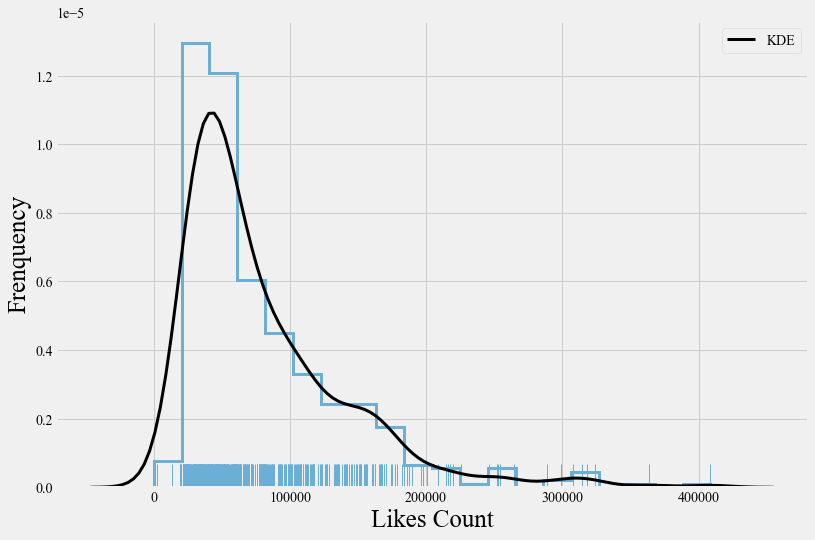

In [180]:
"""Histogram of likes count"""
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('tab20c')
sns.distplot(df.Likes, rug=True, rug_kws={"color": cmap(1)}, bins=20,
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": cmap(1)})
plt.xlabel('Likes Count', fontsize=25)
plt.ylabel('Frenquency', fontsize=25)

In [93]:
"""Analyzing the tweets sentiment"""
vader = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Tweet'].apply(lambda tweet: vader.polarity_scores(tweet)['compound'])
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2020-10-01,Thank you @HerschelWalker! \nhttps://t.co/XjlY...,51,1311512518800470016,19068,5534,0.4199
1,2020-10-01,Thank you Paul! https://t.co/aAk1sfww0d,39,1311501225423073281,22586,5691,0.4199
2,2020-10-01,"100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WA...",139,1311500843309387781,65495,18742,-0.2023
3,2020-10-01,"In just 3 and a half years, we have secured Am...",140,1311498845860196355,30194,8138,0.7783
4,2020-10-01,"As VP, Biden wiped out the Iron Range – seven ...",140,1311497943363379200,19057,5668,0.0000


Text(0.15, -0.07, 'Negative')

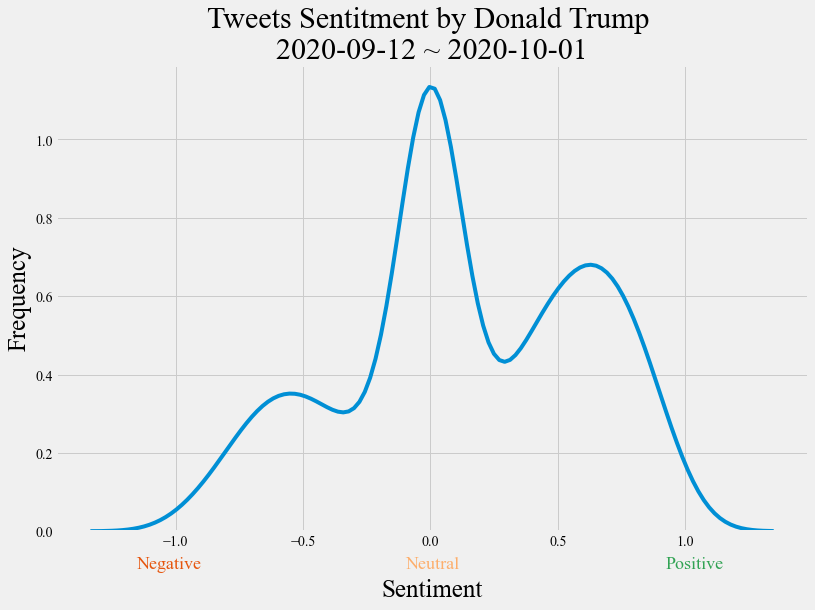

In [234]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
sns.distplot(df.Sentiment, hist=False)
plt.xlabel('Sentiment', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title('Tweets Sentitment by Donald Trump \n' + df.Date.iloc[-1].strftime("%Y-%m-%d") + ' ~ ' + df.Date.iloc[0].strftime("%Y-%m-%d"),
          fontsize=30)
ax.xaxis.labelpad = 30
ax.annotate('Positive', (0.85, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=18, color=cmap(8))
ax.annotate('Neutral', (0.5, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=18, color=cmap(6))
ax.annotate('Negative', (0.15, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=18, color=cmap(4))

In [235]:
fig.savefig('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/gallery/tweets_dtrump_sentiment_hist.png', bbox_inches='tight', pad_inches=0.1)

In [128]:
"""Average daily sentiment """
date_df = df.groupby(['Date']).mean().reset_index()
date_df.head()

,Date,Length,ID,Likes,Retweets,Sentiment
0,2020-09-12,82.107143,1.304804e+18,85800.642857,21430.428571,0.181689
1,2020-09-13,99.461538,1.305115e+18,90353.923077,22717.692308,-0.036908
2,2020-09-14,83.487179,1.305497e+18,59099.435897,14231.666667,-0.041474
3,2020-09-15,95.000000,1.305832e+18,91756.300000,21599.200000,0.164940
4,2020-09-16,69.461538,1.306196e+18,104862.384615,22969.153846,0.134285


C:\Users\Victiny\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.0, 0.01, 'Negative')

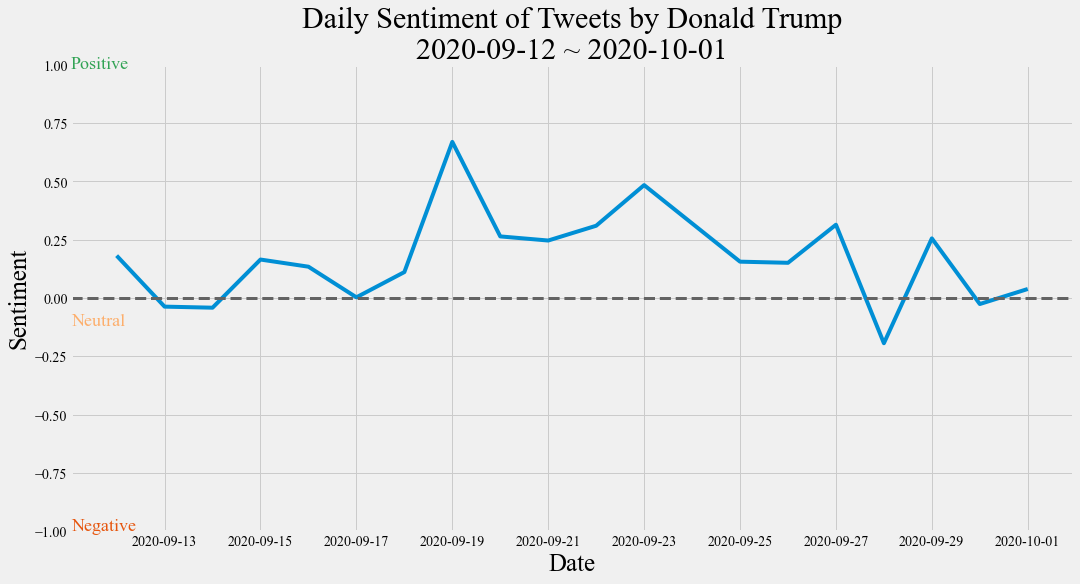

In [236]:
fig = plt.figure(figsize=(16, 8))
sns.lineplot(data=date_df, x='Date', y='Sentiment')
plt.axhline(y=0, color=cmap(16), lw=3, linestyle='--')
plt.ylim(-1, 1)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Sentiment', fontsize=25)
plt.title('Daily Sentiment of Tweets by Donald Trump\n' + df.Date.iloc[-1].strftime("%Y-%m-%d") + ' ~ ' + df.Date.iloc[0].strftime("%Y-%m-%d"), fontsize=30)
ax = fig.add_subplot()
ax.annotate('Positive', (0., 1), xycoords='axes fraction', va='center', ha='left',fontsize=18, color=cmap(8))
ax.annotate('Neutral', (0., 0.45), xycoords='axes fraction', va='center', ha='left',fontsize=18, color=cmap(6))
ax.annotate('Negative', (0., 0.01), xycoords='axes fraction', va='center', ha='left',fontsize=18, color=cmap(4))

In [237]:
fig.savefig('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/gallery/tweets_dtrump_sentiment_daily.png', bbox_inches='tight', pad_inches=0.1)

(-0.5, 399.5, 199.5, -0.5)

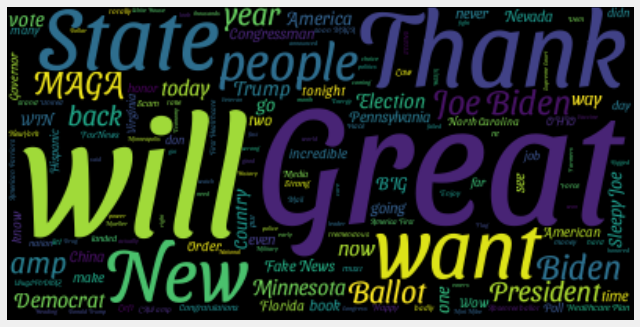

In [238]:
"""Make a wordcloud"""
text_all = " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(['HTTPS', 'CO'])

# fp = 'arial'
fp = 'SansitaSwashed-VariableFont_wght.ttf'
wordcloud  = WordCloud(stopwords=stopwords, background_color='black', #colormap=plt.get_cmap('bwr'), 
                       font_path=fp).generate(text_all)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

In [239]:
fig.savefig('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/gallery/wordcloud_tweets_dtrump.png', bbox_inches='tight', pad_inches=0.1)

(-0.5, 499.5, 499.5, -0.5)

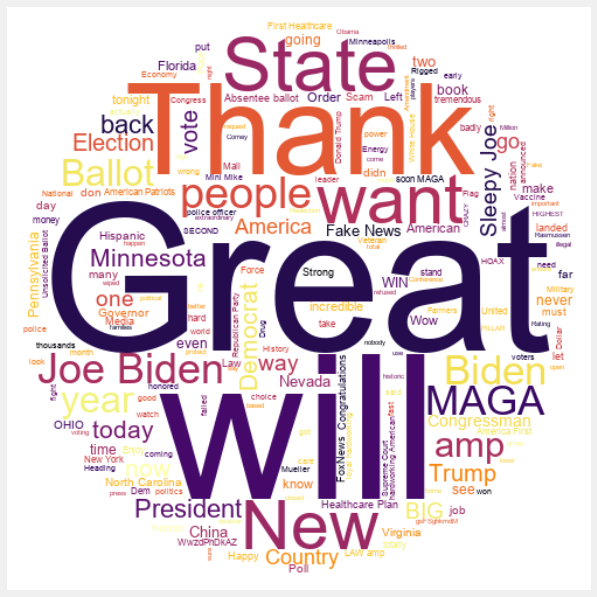

In [240]:
"""Masked wordcloud"""
x, y = np.ogrid[:500, :500]
mask = (x-250)**2 + (y-250)**2 > 240**2
mask = 255*mask.astype(int)

fp='arial'
wc_mask = WordCloud(stopwords=stopwords, background_color='white', colormap=plt.get_cmap('inferno'), 
                       font_path=fp, mask=mask).generate(text_all)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.imshow(wc_mask, interpolation='bilinear')
ax.axis('off')

In [241]:
fig.savefig('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/gallery/wordcloud_tweets_dtrump_mask_circle.png', bbox_inches='tight', pad_inches=0.1)

(1000, 1000, 3)

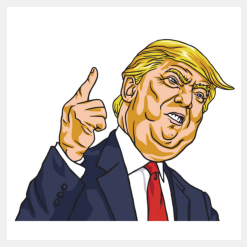

In [227]:
dtrump = np.array(Image.open('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/donald_trump.jpg'))
dtrump = dtrump[:1000,:1000,:]
plt.imshow(dtrump)
plt.axis('off')
dtrump.shape

(-0.5, 999.5, 999.5, -0.5)

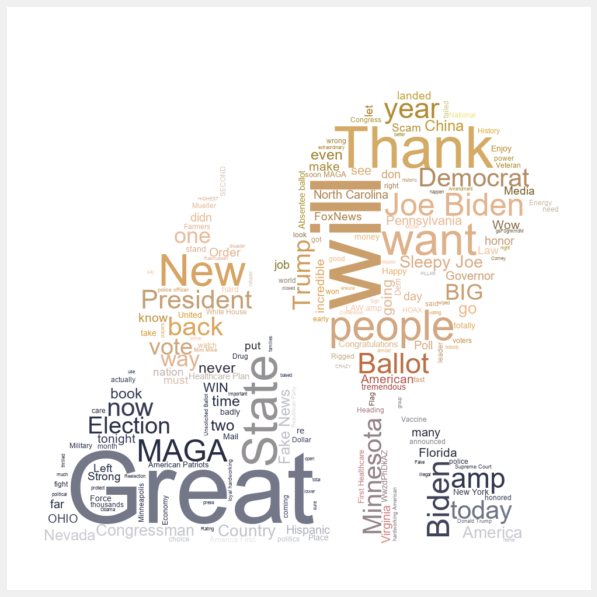

In [242]:
wc_dtrump = WordCloud(stopwords=stopwords, background_color='white', colormap=plt.get_cmap('inferno'), 
                       font_path=fp, mask=dtrump).generate(text_all)

# create colorung from image
dtrump_colors = ImageColorGenerator(dtrump)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.imshow(wc_dtrump.recolor(color_func=dtrump_colors), interpolation='bilinear')
ax.axis('off')

In [243]:
fig.savefig('C:/Users/Victiny/Python_Project/Tweet_Analysis_Visualization/gallery/wordcloud_tweets_dtrump_mask_dtrump.png', bbox_inches='tight', pad_inches=0.1)